## General

In [1]:
# evaluate all lines in cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import datetime
# TODAY = datetime.datetime.today()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import special,optimize

In [45]:
zs = np.linspace(0.0,2.5,100)
zs

array([0.        , 0.02525253, 0.05050505, 0.07575758, 0.1010101 ,
       0.12626263, 0.15151515, 0.17676768, 0.2020202 , 0.22727273,
       0.25252525, 0.27777778, 0.3030303 , 0.32828283, 0.35353535,
       0.37878788, 0.4040404 , 0.42929293, 0.45454545, 0.47979798,
       0.50505051, 0.53030303, 0.55555556, 0.58080808, 0.60606061,
       0.63131313, 0.65656566, 0.68181818, 0.70707071, 0.73232323,
       0.75757576, 0.78282828, 0.80808081, 0.83333333, 0.85858586,
       0.88383838, 0.90909091, 0.93434343, 0.95959596, 0.98484848,
       1.01010101, 1.03535354, 1.06060606, 1.08585859, 1.11111111,
       1.13636364, 1.16161616, 1.18686869, 1.21212121, 1.23737374,
       1.26262626, 1.28787879, 1.31313131, 1.33838384, 1.36363636,
       1.38888889, 1.41414141, 1.43939394, 1.46464646, 1.48989899,
       1.51515152, 1.54040404, 1.56565657, 1.59090909, 1.61616162,
       1.64141414, 1.66666667, 1.69191919, 1.71717172, 1.74242424,
       1.76767677, 1.79292929, 1.81818182, 1.84343434, 1.86868

In [46]:
def ΗfunctionLCDM(z,y):
    omegam = y[0]
    h = y[1]
    E = (omegam*((1+z)**3)+(1-omegam))**0.5
    return 100*h*E

In [47]:
ΗfunctionLCDM(zs,[0.3,0.7])

array([ 70.        ,  70.81101271,  71.65309135,  72.52613299,
        73.43000035,  74.36452438,  75.32950685,  76.32472293,
        77.34992373,  78.40483879,  79.48917847,  80.60263631,
        81.74489116,  82.91560939,  84.11444678,  85.34105047,
        86.59506062,  87.87611207,  89.18383583,  90.51786044,
        91.8778132 ,  93.26332132,  94.67401293,  96.10951801,
        97.56946919,  99.05350249, 100.5612579 , 102.09238001,
       103.64651845, 105.22332825, 106.82247027, 108.4436114 ,
       110.08642487, 111.75059035, 113.43579416, 115.1417293 ,
       116.86809558, 118.61459963, 120.38095488, 122.16688157,
       123.97210671, 125.79636399, 127.63939377, 129.50094292,
       131.38076476, 133.27861895, 135.19427137, 137.12749396,
       139.07806467, 141.04576724, 143.03039112, 145.0317313 ,
       147.0495882 , 149.0837675 , 151.13408002, 153.20034155,
       155.28237275, 157.37999899, 159.49305023, 161.62136084,
       163.76476954, 165.92311921, 168.09625679, 170.28

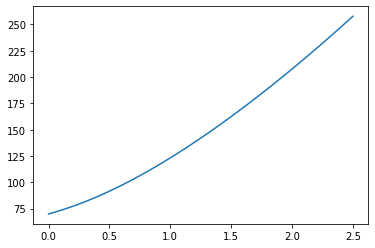

In [48]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))

In [49]:
def Ηfunction(z,y,equationE):
    '''
    f(Q) = Qexp(lmbd*Q_0/Q)
    '''
    global  Om_m0, a, h
    a = y[2]
    Om_m0 = y[0]
    h = y[1]
    T_cmb = 2.7255
    Omr = Om_m0/(1. + 2.5e4 * Om_m0 * h**2. * (T_cmb/2.7)**(-4.))
    expr = (Om_m0 + Omr)/(-2*np.exp(0.5))
    H_0 = 100*h
    T_cmb = 2.7255
    Om_r = Om_m0/(1. + 2.5e4 * Om_m0* h**2. * (T_cmb/2.7)**(-4.))
    Og_mod = 31500. * (T_cmb/2.7)**(-4.)
    Om_l = 1. - Om_m0- Om_r
    x0E = (Om_m0*(1.+z)**3. + Om_r*(1.+ z)**4. + Om_l)**0.5
    res = optimize.newton(equationE, x0E, args = (z,)) 
    return H_0*res

array([0.7       , 0.68405734, 0.66807352, 0.6520863 , 0.63613173,
       0.62024391, 0.60445486, 0.58879437, 0.57328997, 0.55796684,
       0.54284783, 0.52795344, 0.51330191, 0.49890922, 0.4847892 ,
       0.47095363, 0.45741234, 0.4441733 , 0.43124277, 0.41862538,
       0.40632432, 0.39434139, 0.38267717, 0.3713311 , 0.36030164,
       0.34958633, 0.33918194, 0.32908453, 0.31928953, 0.30979189,
       0.3005861 , 0.29166625, 0.28302616, 0.2746594 , 0.26655933,
       0.25871918, 0.25113208, 0.24379109, 0.23668926, 0.22981964,
       0.22317532, 0.21674942, 0.21053517, 0.20452587, 0.19871495,
       0.19309594, 0.18766252, 0.18240849, 0.17732781, 0.17241459,
       0.16766309, 0.16306774, 0.15862312, 0.15432398, 0.1501652 ,
       0.14614187, 0.14224919, 0.13848255, 0.13483747, 0.13130964,
       0.12789488, 0.12458918, 0.12138864, 0.11828952, 0.11528821,
       0.11238123, 0.10956522, 0.10683695, 0.10419331, 0.1016313 ,
       0.09914803, 0.09674074, 0.09440673, 0.09214344, 0.08994

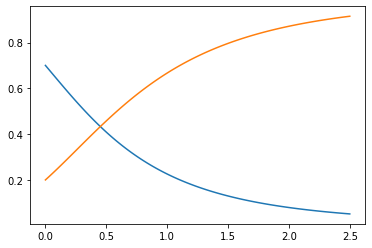

In [50]:
# fish plot for LCDM 
# \Omega_{\Lambda} = E**2 -Omega_{m0} (1+z)**3
omegam = 0.2
h = 0.6
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/ΗfunctionLCDM(zs,[omegam,h]))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((ΗfunctionLCDM(zs,[omegam,h])/(100*h))**2))
# intersection point(transition redshift), to the left accelarated, to the right disaccelerated 

# Model 1

In [91]:
equation_E1 = lambda E,z: E**2 + E**(2*a)*(-1 + (Om_m0)) - (1 + z)**3*(Om_m0)

In [92]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunction(0,[0.3,0.7,-0.5],equation_E1))

70.0


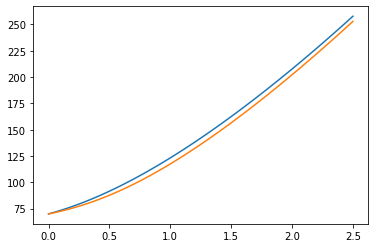

In [93]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunction(zs,[0.3,0.7,-0.5],equation_E1))

array([0.7       , 0.68281644, 0.66548058, 0.64803722, 0.63053068,
       0.61300437, 0.5955005 , 0.57805978, 0.56072113, 0.54352144,
       0.52649539, 0.50967527, 0.49309086, 0.47676937, 0.46073533,
       0.44501063, 0.42961452, 0.41456361, 0.39987201, 0.38555134,
       0.37161091, 0.35805778, 0.34489695, 0.33213146, 0.31976254,
       0.30778979, 0.29621131, 0.28502383, 0.27422292, 0.26380305,
       0.25375778, 0.24407988, 0.23476143, 0.22579397, 0.21716854,
       0.20887585, 0.20090633, 0.1932502 , 0.18589756, 0.17883845,
       0.17206289, 0.16556097, 0.15932284, 0.15333878, 0.14759924,
       0.14209483, 0.13681638, 0.13175493, 0.12690177, 0.12224841,
       0.11778666, 0.11350855, 0.1094064 , 0.10547278, 0.10170055,
       0.0980828 , 0.09461292, 0.09128452, 0.0880915 , 0.08502797,
       0.08208832, 0.07926715, 0.07655929, 0.0739598 , 0.07146395,
       0.06906721, 0.06676526, 0.06455396, 0.06242937, 0.06038772,
       0.05842539, 0.05653896, 0.05472513, 0.05298078, 0.05130

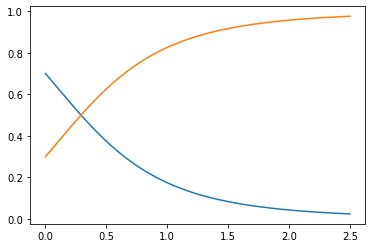

In [94]:
omegam = 0.3
h = 0.6
a = -0.3
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunction(zs,[omegam,h,a],equation_E1))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunction(zs,[omegam,h,a],equation_E1)/(100*h))**2))
# intersection point(transition redshift), to the left accelarated, to the right 

# Model 2

In [72]:
def Ηfunctionexp1(z,y):
    '''
    f(Q) = Qexp(lmbd*Q_0/Q)
    '''
    Om_m0 = y[0]
    h = y[1]
    T_cmb = 2.7255
    Omr = Om_m0/(1. + 2.5e4 * Om_m0 * h**2. * (T_cmb/2.7)**(-4.))
    expr = (Om_m0 + Omr)/(-2*np.exp(0.5))
    a = (0.5 + special.lambertw(expr,k=0)).real
    H_0 = 100*h
    T_cmb = 2.7255
    Om_r = Om_m0/(1. + 2.5e4 * Om_m0* h**2. * (T_cmb/2.7)**(-4.))
    Og_mod = 31500. * (T_cmb/2.7)**(-4.)
    Om_l = 1. - Om_m0- Om_r
    x0E = (Om_m0*(1.+z)**3. + Om_r*(1.+z)**4. + Om_l)**0.5
    equation_E = lambda E: (E**2.- 2*a)* np.exp(a*1./E**2)- Om_m0*(1.+z)**3- Om_r*(1.+z)**4
    res = optimize.newton(equation_E, x0E) 
    return H_0*res

In [73]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunctionexp1(0,[0.3,0.7]))

70.0


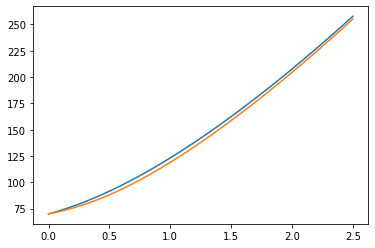

In [74]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunctionexp1(zs,[0.3,0.7]))

array([0.7       , 0.68405734, 0.66807352, 0.6520863 , 0.63613173,
       0.62024391, 0.60445486, 0.58879437, 0.57328997, 0.55796684,
       0.54284783, 0.52795344, 0.51330191, 0.49890922, 0.4847892 ,
       0.47095363, 0.45741234, 0.4441733 , 0.43124277, 0.41862538,
       0.40632432, 0.39434139, 0.38267717, 0.3713311 , 0.36030164,
       0.34958633, 0.33918194, 0.32908453, 0.31928953, 0.30979189,
       0.3005861 , 0.29166625, 0.28302616, 0.2746594 , 0.26655933,
       0.25871918, 0.25113208, 0.24379109, 0.23668926, 0.22981964,
       0.22317532, 0.21674942, 0.21053517, 0.20452587, 0.19871495,
       0.19309594, 0.18766252, 0.18240849, 0.17732781, 0.17241459,
       0.16766309, 0.16306774, 0.15862312, 0.15432398, 0.1501652 ,
       0.14614187, 0.14224919, 0.13848255, 0.13483747, 0.13130964,
       0.12789488, 0.12458918, 0.12138864, 0.11828952, 0.11528821,
       0.11238123, 0.10956522, 0.10683695, 0.10419331, 0.1016313 ,
       0.09914803, 0.09674074, 0.09440673, 0.09214344, 0.08994

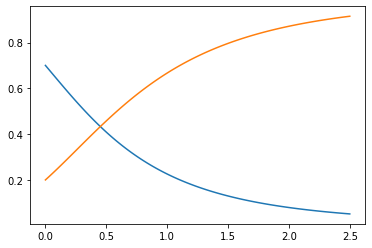

In [75]:
# fish plot for LCDM 
# \Omega_{\Lambda} = E**2 -Omega_{m0} (1+z)**3
omegam = 0.2
h = 0.6
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/ΗfunctionLCDM(zs,[omegam,h]))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((ΗfunctionLCDM(zs,[omegam,h])/(100*h))**2))
# intersection point(transition redshift), to the left accelarated, to the right disaccelerated 

array([0.7       , 0.6821295 , 0.66405735, 0.64583617, 0.62751906,
       0.60915905, 0.59080853, 0.57251874, 0.55433924, 0.53631745,
       0.5184982 , 0.50092336, 0.48363152, 0.46665774, 0.45003338,
       0.43378596, 0.41793914, 0.40251275, 0.38752285, 0.37298187,
       0.3588988 , 0.34527939, 0.33212641, 0.31943988, 0.30721739,
       0.29545431, 0.28414412, 0.27327866, 0.26284837, 0.25284256,
       0.24324958, 0.23405709, 0.22525219, 0.21682162, 0.20875188,
       0.20102937, 0.1936405 , 0.1865718 , 0.17980995, 0.1733419 ,
       0.16715487, 0.16123645, 0.15557457, 0.15015759, 0.14497425,
       0.14001372, 0.13526561, 0.13071995, 0.12636719, 0.12219821,
       0.1182043 , 0.11437714, 0.11070882, 0.1071918 , 0.1038189 ,
       0.10058329, 0.09747849, 0.09449834, 0.09163698, 0.08888884,
       0.08624865, 0.08371141, 0.08127234, 0.07892694, 0.07667092,
       0.07450021, 0.07241096, 0.07039949, 0.06846234, 0.06659618,
       0.0647979 , 0.06306451, 0.06139317, 0.05978121, 0.05822

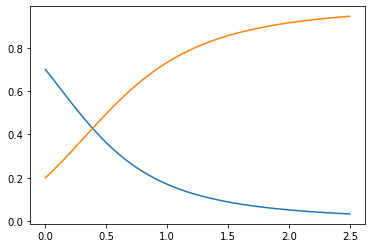

In [76]:
# fish plot for exp1 
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunctionexp1(zs,[omegam,h]))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunctionexp1(zs,[omegam,h])/(100*h))**2))
# intersection point, to the left accelarated, to the right disaccelerated 

# Model 3

In [77]:
equation_E3 = lambda E,z: E**2 - (1 + z)**3*(Om_m0) - E**2*(1 + np.exp(1)**((E**2*(-1 + 2*special.lambertw((np.sqrt(np.exp(1))*(Om_m0))/2).real))/2)*(-1 + E**2 - 2*E**2*special.lambertw((np.sqrt(np.exp(1))*(Om_m0))/2).real))

In [78]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunction(0,[0.3,0.7,-0.5],equation_E3))

70.0


/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:445: RuntimeWarning: RMS of 124.862 reached
  warnings.warn(


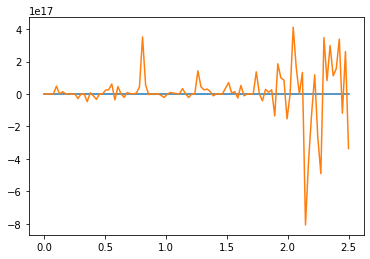

In [79]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunction(zs,[0.3,0.7,-0.5],equation_E3))

/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:445: RuntimeWarning: RMS of 124.862 reached
  warnings.warn(


array([0.7       , 0.62840636, 1.        , 0.78624319, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99902472, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99997611,
       1.        , 0.99953545, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99656474, 1.        , 1.        , 1.        , 1.     

/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:445: RuntimeWarning: RMS of 176.704 reached
  warnings.warn(


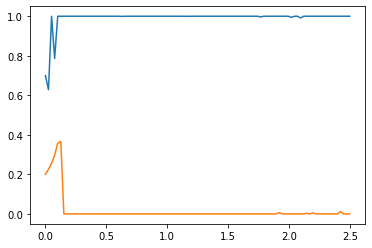

In [80]:
# fish plot for Ηfunction
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunction(zs,[omegam,h,1,-0.5],equation_E3))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunction(zs,[omegam,h,-0.5],equation_E3)/(100*h))**2))
# intersection point, to the left accelarated, to the right disaccelerated 

# Model 4

In [81]:
equation_E4 = lambda E,z: E**2 - (100**(2.7755575615628914*(10**-17)*np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real))*
    h**(np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real)*(-0.18201499873448362 + 
       0.6065306597126335*(Om_m0)))*
    (h*E)**(2*a + np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real)*
       (0.18201499873448365 - 0.6065306597126335*(Om_m0)))*
    (np.exp(1)**(((-1 + E**2)*(1 - 2*a + 2*special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real))/2)*
      (-0.3000919999999996 + 0.9999999999999998*E**2) + 
     np.exp(1)**((E**2*(1 - 2*a + 2*special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real))/2)*
      (0.9999999999999998 - 1.9999999999999996*a - 0.9999999999999998*E**2 + 
       1.9999999999999996*a*E**2)) + 
   (100**(2.7755575615628914*(10**-17)*np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real))*
      np.exp(1)**(((-1 + E**2)*(1 - 2*a + 2*special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real))/2)*
      h**(np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real)*(-0.18201499873448362 + 
         0.6065306597126335*(Om_m0)))*
      (h*E)**(2*a + np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real)*
         (0.18201499873448365 - 0.6065306597126335*(Om_m0)))*(0.9999999999999998 - 
       0.9999999999999998*E**2) + 1.*h**(2*a)*(1. + 1.*z)**3)*(Om_m0))/h**(2*a)
# fix friedmann

In [82]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunction(0,[0.3,0.7,-0.5],equation_E4))

69.99932012446848


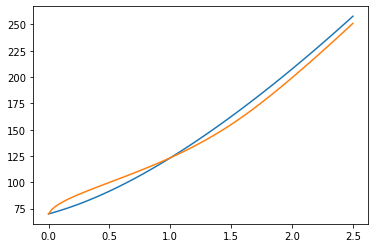

In [83]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunction(zs,[0.3,0.7,1],equation_E4))

array([6.99795647e-01, 7.10379858e-01, 7.08979755e-01, 7.03628403e-01,
       6.96196112e-01, 6.87437925e-01, 6.77737199e-01, 6.67316953e-01,
       6.56319708e-01, 6.44843265e-01, 6.32958700e-01, 6.20720229e-01,
       6.08170964e-01, 5.95346470e-01, 5.82277040e-01, 5.68989208e-01,
       5.55506796e-01, 5.41851637e-01, 5.28044103e-01, 5.14103489e-01,
       5.00048302e-01, 4.85896473e-01, 4.71665529e-01, 4.57372717e-01,
       4.43035106e-01, 4.28669668e-01, 4.14293337e-01, 3.99923060e-01,
       3.85575834e-01, 3.71268736e-01, 3.57018942e-01, 3.42843745e-01,
       3.28760559e-01, 3.14786924e-01, 3.00940501e-01, 2.87239063e-01,
       2.73700477e-01, 2.60342685e-01, 2.47183675e-01, 2.34241438e-01,
       2.21533934e-01, 2.09079028e-01, 1.96894435e-01, 1.84997641e-01,
       1.73405823e-01, 1.62135750e-01, 1.51203674e-01, 1.40625213e-01,
       1.30415212e-01, 1.20587600e-01, 1.11155232e-01, 1.02129719e-01,
       9.35212562e-02, 8.53384393e-02, 7.75880868e-02, 7.02750638e-02,
      

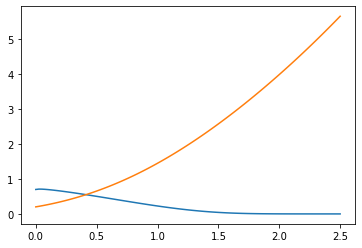

In [84]:
# fish plot for Ηfunction
def omegalamda(zs,omegam,h):
      return 1 - (((100*h)/Ηfunction(zs,[omegam,h,1,-1],equation_E4))**2)*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunction(zs,[omegam,h,-1],equation_E4)/(100*h))**2))
# intersection point, to the left accelarated, to the right disaccelerated 

# Model 5

In [27]:
equation_E5 = lambda E,z: -E + E**2 - (-E + (1 + z)**3)*(Om_m0)

In [73]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunction(0,[0.3,0.7,-0.5],equation_E5))

70.0


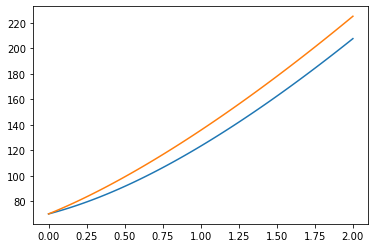

In [28]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunction(zs,[0.3,0.7,1],equation_E5))

array([0.7       , 0.69025555, 0.6806075 , 0.67106248, 0.66162636,
       0.6523042 , 0.64310039, 0.63401864, 0.62506206, 0.61623322,
       0.60753415, 0.59896645, 0.59053128, 0.58222939, 0.57406122,
       0.56602688, 0.55812618, 0.5503587 , 0.54272379, 0.53522058,
       0.52784803, 0.52060496, 0.51349003, 0.5065018 , 0.49963869,
       0.49289908, 0.48628123, 0.47978336, 0.47340363, 0.46714017,
       0.46099106, 0.45495436, 0.4490281 , 0.44321033, 0.43749906,
       0.43189232, 0.42638813, 0.42098453, 0.41567956, 0.41047129,
       0.40535779, 0.40033716, 0.39540753, 0.39056703, 0.38581384,
       0.38114616, 0.3765622 , 0.37206022, 0.36763851, 0.36329537,
       0.35902916, 0.35483825, 0.35072104, 0.34667596, 0.3427015 ,
       0.33879615, 0.33495843, 0.33118692, 0.3274802 , 0.3238369 ,
       0.32025567, 0.31673519, 0.31327418, 0.30987137, 0.30652553,
       0.30323547, 0.3       , 0.29681798, 0.29368828, 0.29060981,
       0.2875815 , 0.2846023 , 0.28167119, 0.27878718, 0.27594

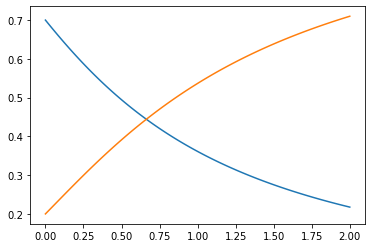

In [29]:
# fish plot for Ηfunction
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunction(zs,[omegam,h,1],equation_E5))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunction(zs,[omegam,h,1],equation_E5)/(100*h))**2))
# intersection point, to the left accelarated, to the right disaccelerated 

# Model 6

In [30]:
equation_E6 = lambda E,z: E**2 - (1 + z)**3*(Om_m0) - (E**(-2 + 2*a)*(-1 + (Om_m0))*(-2*(1/(np.cosh(E**(-2))))**2 + (-1 + 2*a)*E**2*np.tanh(E**(-2))))/(2*(1/(np.cosh(1)))**2 + np.tanh(1) - 2*a*np.tanh(1))

In [31]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunction(0,[0.3,0.7,-0.5],equation_E6))

70.0


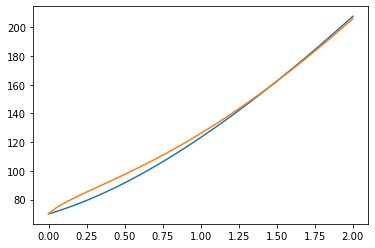

In [32]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunction(zs,[0.3,0.7,0.5],equation_E6))

array([0.7       , 0.69845543, 0.6938855 , 0.68773315, 0.68058677,
       0.67274946, 0.66440026, 0.65565522, 0.646595  , 0.63727883,
       0.62775221, 0.6180514 , 0.60820631, 0.5982422 , 0.58818096,
       0.57804193, 0.56784242, 0.55759819, 0.54732372, 0.53703242,
       0.52673683, 0.51644869, 0.50617908, 0.49593848, 0.48573682,
       0.47558349, 0.46548744, 0.45545712, 0.44550058, 0.43562542,
       0.42583883, 0.41614761, 0.40655815, 0.39707644, 0.3877081 ,
       0.37845836, 0.36933205, 0.36033367, 0.3514673 , 0.34273671,
       0.33414526, 0.32569599, 0.31739159, 0.3092344 , 0.30122646,
       0.29336944, 0.28566476, 0.27811348, 0.27071641, 0.26347407,
       0.25638669, 0.24945428, 0.24267659, 0.23605312, 0.22958317,
       0.22326584, 0.21710001, 0.21108441, 0.20521757, 0.19949789,
       0.19392361, 0.18849284, 0.18320359, 0.17805374, 0.17304107,
       0.16816329, 0.16341803, 0.15880286, 0.15431528, 0.14995275,
       0.1457127 , 0.14159252, 0.13758958, 0.13370125, 0.12992

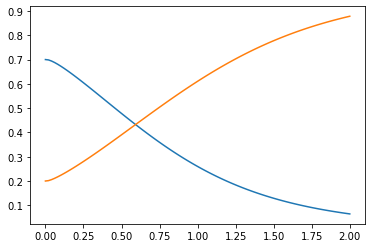

In [33]:
# fish plot for Ηfunction
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunction(zs,[omegam,h,0.5],equation_E6))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunction(zs,[omegam,h,0.5],equation_E6)/(100*h))**2))
# intersection point, to the left accelarated, to the right disaccelerated 

# Model 7

In [34]:
equation_E7 = lambda E,z: E**2 + (np.exp(1)**(-1 + E**2)*(1 - E**2 + 2*E**4)*(-1 + (Om_m0)))/2 - (1 + z)**3*(Om_m0)

In [35]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunction(0,[0.3,0.7,-0.5],equation_E7))

70.0


/tmp/ipykernel_58172/2306859768.py:1: RuntimeWarning: overflow encountered in power
  equation_E7 = lambda E,z: E**2 + (np.exp(1)**(-1 + E**2)*(1 - E**2 + 2*E**4)*(-1 + (Om_m0)))/2 - (1 + z)**3*(Om_m0)
/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:419: RuntimeWarning: invalid value encountered in true_divide
  dp = (q1 * (p1 - p))[nz_der] / (q1 - q0)[nz_der]
/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:426: RuntimeWarning: invalid value encountered in greater_equal
  failures[nz_der] = np.abs(dp) >= tol  # not yet converged
/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:459: RuntimeWarning: some failed to converge after 50 iterations
  warnings.warn(msg, RuntimeWarning)


array([ 7.00000000e-01,  6.72710583e-01,  6.40485141e-01,  5.99015894e-01,
        5.05227402e-01, -1.97392254e+00,  5.31629233e-01, -1.50848972e-01,
       -2.49368691e+03,  3.47702826e-01, -2.51620772e+01,  6.31404684e-01,
                   nan,  4.78342911e-01,             nan, -2.20574868e+00,
       -2.55802973e+01, -4.73009753e+00, -3.17549055e+01,             nan,
       -1.95225515e+02,             nan,  9.51483961e-01,  4.24530759e-01,
       -1.67984222e+01, -3.55817717e+01, -5.40374084e+02, -2.52975019e+01,
       -1.28450549e+01, -1.15088941e+01, -1.05702212e+01, -9.55834430e+00,
       -8.31318111e+00, -1.81487551e+00, -2.26272074e+00,             nan,
       -3.15650937e+00, -7.83326970e+01, -9.18964946e+01, -1.59445317e+01,
       -8.09405316e+00, -5.49565844e+00, -3.61448152e+00, -2.87056362e+00,
       -1.67396619e+00, -3.56601303e+00, -1.08751852e+02, -7.82720251e+01,
        8.31065807e-01, -7.90720499e+00,             nan,  7.94616086e-01,
       -2.45723190e-01, -

/tmp/ipykernel_58172/2306859768.py:1: RuntimeWarning: overflow encountered in power
  equation_E7 = lambda E,z: E**2 + (np.exp(1)**(-1 + E**2)*(1 - E**2 + 2*E**4)*(-1 + (Om_m0)))/2 - (1 + z)**3*(Om_m0)
/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:419: RuntimeWarning: invalid value encountered in true_divide
  dp = (q1 * (p1 - p))[nz_der] / (q1 - q0)[nz_der]
/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:426: RuntimeWarning: invalid value encountered in greater_equal
  failures[nz_der] = np.abs(dp) >= tol  # not yet converged
/home/fotis/miniconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:459: RuntimeWarning: some failed to converge after 50 iterations
  warnings.warn(msg, RuntimeWarning)


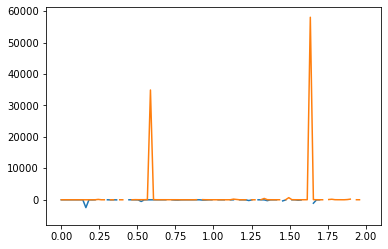

In [36]:
# fish plot for Ηfunction
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunction(zs,[omegam,h,0.5],equation_E7))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunction(zs,[omegam,h,0.5],equation_E7)/(100*h))**2))
# intersection point, to the left accelarated, to the right disaccelerated 